<a href="https://colab.research.google.com/github/Amitgm/mlprojects/blob/main/LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [2]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [3]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [4]:
# Read the hour.csv file
# YOUR CODE HERE
hours = pd.read_csv("hour.csv")

print the first five rows of dataset

In [5]:
# YOUR CODE HERE
hours.head(4)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13


print the datatypes of the columns

In [6]:
# YOUR CODE HERE
hours.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [7]:
hours.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
hours.head(4)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13


In [9]:
hours.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


#### Converting hours to date time

In [10]:
hours["dteday"] = pd.to_datetime(hours["dteday"])

In [11]:
catgorical_columns = ["season","yr","mnth","hr","holiday","weekday","workingday","weathersit"]

#### Handling categorical features

In [12]:
catgorical_features = hours[catgorical_columns]

#### Handling numerical features

In [13]:
numeric_features = hours.drop(catgorical_columns,axis=1)

In [14]:
catgorical_features.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,0,1,0,0,6,0,1
1,1,0,1,1,0,6,0,1
2,1,0,1,2,0,6,0,1


In [15]:
numeric_features.drop("instant",axis=1,inplace=True)

In [16]:
numeric_features.head(3)

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,0.22,0.2727,0.80,0.0,5,27,32


In [17]:
hours.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


<Axes: xlabel='hr'>

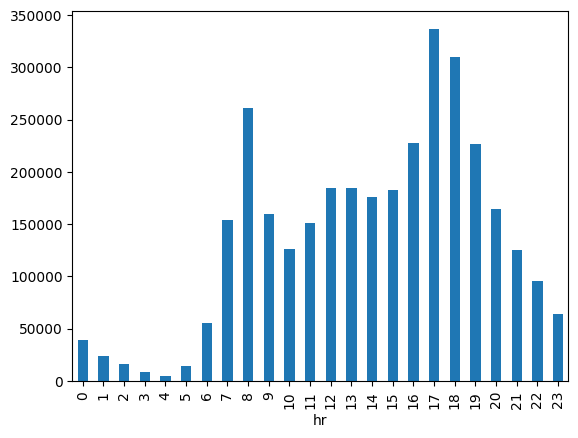

In [18]:
# YOUR CODE HERE
hours.groupby("hr")["cnt"].sum().plot(kind="bar")

In [19]:
hours.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Visualize the distribution of count, casual and registered variables

<ipython-input-20-8aec27b1b38c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours["cnt"],bins="auto")


<Axes: xlabel='cnt', ylabel='Density'>

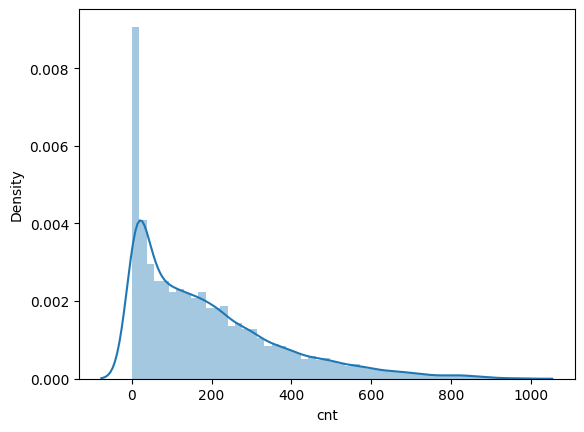

In [20]:
# YOUR CODE HERE for distribuiton of count variable
# to map a normal dist curve
sns.distplot(hours["cnt"],bins="auto")

<ipython-input-21-63d8152dda46>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours["casual"],bins="auto")


<Axes: xlabel='casual', ylabel='Density'>

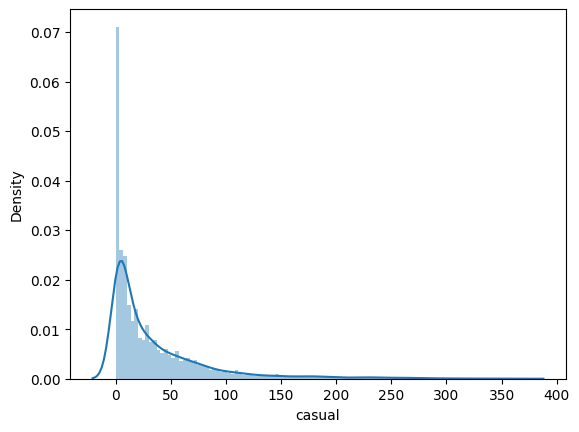

In [21]:
# YOUR CODE HERE for distribuiton of casual variable
sns.distplot(hours["casual"],bins="auto")

<Axes: xlabel='registered', ylabel='Count'>

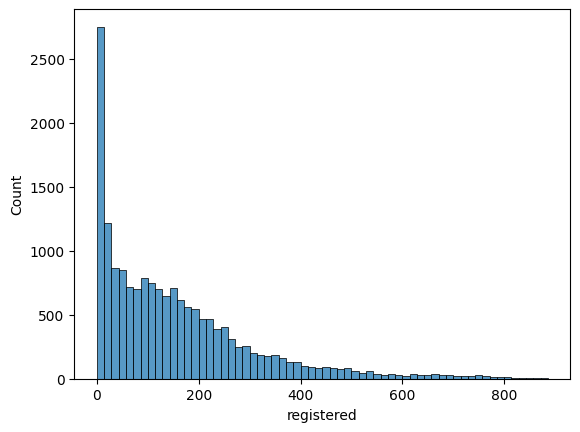

In [22]:
# YOUR CODE HERE for distribuiton of registered variable
sns.histplot(hours["registered"],bins="auto")

In [23]:
hours[["workingday","weekday","holiday"]].head(4)

,workingday,weekday,holiday
0,0,6,0
1,0,6,0
2,0,6,0
3,0,6,0


In [24]:
hours.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
hours[hours["workingday"]==1].weekday.value_counts()

,count
weekday,
3,2451
5,2439
2,2430
4,2423
1,2122


In [26]:
hours[["workingday","weekday","holiday"]].head(3)

,workingday,weekday,holiday
0,0,6,0
1,0,6,0
2,0,6,0


#### Describe the relation of weekday, holiday and working day

In [27]:
# YOUR CODE HERE
hours[hours["holiday"]==1].weekday.unique()

array([1, 5, 4, 3, 2])

In [28]:
# not a working day and not a holiday
hours[(hours["holiday"]==0) & (hours["workingday"]==0)].weekday.value_counts()

,count
weekday,
6,2512
0,2502


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

In [29]:
hours.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [30]:
hours["year"] = hours["dteday"].dt.year

<Axes: xlabel='mnth'>

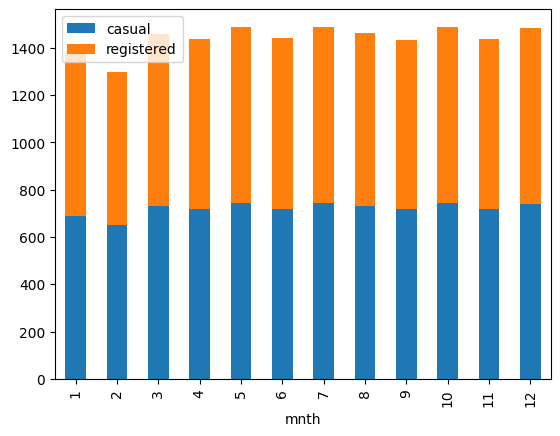

In [31]:
# stacked bar chart for year 2011
# YOUR CODE HERE
hours.head(2)
hours[hours["year"]== 2011].groupby("mnth")[["casual","registered"]].count().plot(kind="bar",stacked=True)

<Axes: xlabel='mnth'>

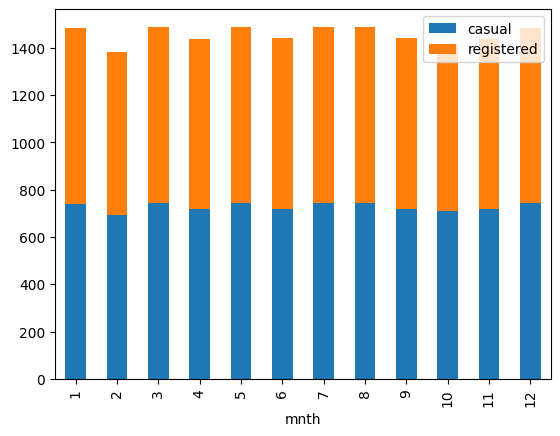

In [32]:
# stacked bar chart for year 2012
hours[hours["year"]== 2012].groupby("mnth")[["casual","registered"]].count().plot(kind="bar",stacked=True)

#### Analyze the correlation between features with heatmap

In [33]:
numeric_features.head(2)

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,0.22,0.2727,0.80,0.0,8,32,40


In [34]:
# YOUR CODE HERE
hours_corr = hours.corr()

#### Visualize the box plot of casual and registered variables to check the outliers

In [35]:
# YOUR CODE HERE
corr = numeric_features.corr()

<Axes: >

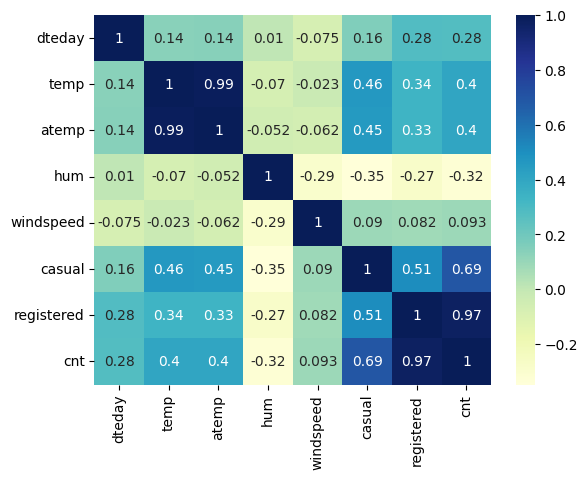

In [36]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [37]:
# YOUR CODE HERE
hours.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011


In [38]:
hours.drop(["instant","dteday"],axis=1,inplace=True)

#### Identify categorical and continuous variables


In [39]:
hours.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011


In [172]:
hour_new = hours.copy()

In [175]:
hour_new.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,year
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16,2011
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40,2011


In [174]:
hour_new.drop(["atemp"],axis=1,inplace=True)

In [176]:
hour_new.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,year
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16,2011
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40,2011


In [177]:
hour_new.nunique()

,0
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4
temp,50
hum,89


In [180]:
numeric_columns = ["windspeed","hum","temp"]
numerical_features = hour_new[numeric_columns]
numerical_features.head(2)

,windspeed,hum,temp
0,0.0,0.81,0.24
1,0.0,0.80,0.22


In [188]:
numerical_features.describe()

,windspeed,hum,temp
count,17379.000000,17379.000000,17379.000000
mean,0.190098,0.627229,0.496987
std,0.122340,0.192930,0.192556
min,0.000000,0.000000,0.020000
25%,0.104500,0.480000,0.340000
50%,0.194000,0.630000,0.500000
75%,0.253700,0.780000,0.660000
max,0.850700,1.000000,1.000000


In [182]:
categorical_columns = [x for x in hour_new.columns if x not in numeric_columns]
categorical_features = hour_new[categorical_columns]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,year
0,1,0,1,0,0,6,0,1,3,13,16,2011
1,1,0,1,1,0,6,0,1,8,32,40,2011


In [184]:
target_features = ["casual","registered","cnt"]
target = hour_new[target_features]
target.head(2)

,casual,registered,cnt
0,3,13,16
1,8,32,40


In [185]:
categorical_features.drop(target,axis=1,inplace=True)

<ipython-input-185-2a73c9092350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features.drop(target,axis=1,inplace=True)


In [186]:
categorical_features.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,year
0,1,0,1,0,0,6,0,1,2011
1,1,0,1,1,0,6,0,1,2011


In [189]:
categorical_features.nunique()

,0
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4
year,2


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [203]:
scaler = StandardScaler()

In [209]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

# use sparse output = False when you want to view the outputs
encoder = OneHotEncoder(sparse_output=False,drop="first")  # drop="first" avoids multicollinearity

# encoder = OneHotEncoder()
# Fit and transform categorical variables
encoded_data = encoder.fit_transform(categorical_features)

encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Get feature names from the dataset

In [210]:
cat_features = encoder.get_feature_names_out().tolist()

In [211]:
cat_features

['season_2',
 'season_3',
 'season_4',
 'yr_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'holiday_1',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'workingday_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4',
 'year_2012']

In [212]:
numerical_features.head(1)

,windspeed,hum,temp
0,0.0,0.81,0.24


#### Concatenaing the encoded and numerical data

In [213]:
features = np.concatenate((numerical_features.values,encoded_data),axis=1)

In [214]:
feature_names = list(numerical_features.columns) + cat_features

In [215]:
feature_Dataframe = pd.DataFrame(features,columns=feature_names)

In [216]:
feature_Dataframe.head(2)

,windspeed,hum,temp,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4,year_2012
0,0.0,0.81,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.80,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [217]:
feature_Dataframe.columns

Index(['windspeed', 'hum', 'temp', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'year_2012'],
      dtype='object')

#### Specify features and targets after applying scaling and one-hot encoding

In [218]:
# take only the cnt target
cnt = target["cnt"]

In [72]:
features.head(2)

,temp,atemp,hum,windspeed,year,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,-1.334648,-1.093281,0.947372,-1.553889,-1.005134,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.438516,-1.181732,0.895539,-1.553889,-1.005134,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [222]:
x_train, x_test, y_train, y_test = train_test_split(features, cnt)
x_train.shape, y_train.shape

((13034, 53), (13034,))

In [240]:
from sklearn import linear_model

#### Applying a SGD regressor

In [241]:
# YOUR CODE HERE
sgd = linear_model.SGDRegressor()
sgd = sgd.fit(x_train, y_train)
print("score is ",sgd.score(x_test, y_test))
mean_squared_error(sgd.predict(x_test), y_test )

score is  0.6897177875706121


10134.665790513176

#### Applying a linear regression

In [243]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(x_train, y_train)
print("score is ",linear_regression.score(x_test, y_test))
mean_squared_error(linear_regression.predict(x_test), y_test)

score is  0.6914843128021084


10076.966244375648

#### Applying Lasso Regression

In [244]:
alpha = [0.001,0.01,0.1,1,10,100]

In [245]:
# YOUR CODE HERE
for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(x_train, y_train)
    mse_lasso_sk = mean_squared_error(y_test, regr_lasso.predict(x_test), multioutput = 'uniform_average')
    print(a, "=====",mse_lasso_sk)
    print("score is ",regr_lasso.score(x_test, y_test))

0.001 ===== 10077.138131260217
score is  0.691479050325384
0.01 ===== 10079.179166723474
score is  0.6914165621277191
0.1 ===== 10144.817484704856
score is  0.6894069840178547
1 ===== 11311.134397590276
score is  0.6536991077440601
10 ===== 27644.801802231013
score is  0.1536286994882905
100 ===== 32668.879017029685
score is  -0.00018809386695184394


#### Applying Ridge Regression

In [246]:
# YOUR CODE HERE
for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(x_train, y_train)

     'uniform_average')
    print(a, "=====",mse_ridge_sk)
    print("score is ",regr_ridge.score(x_test, y_test))

0.001 ===== 10076.968385731303
score is  0.6914842472425148
0.01 ===== 10076.987761137018
score is  0.6914836540464611
0.1 ===== 10077.191649264176
score is  0.6914774118219527
1 ===== 10080.164982634182
score is  0.6913863804573863
10 ===== 10155.678537406931
score is  0.6890744627950169
100 ===== 10940.59086475871
score is  0.6650436423883109


In [220]:
cnt.head(2)

,cnt
0,16
1,40


### Feature scaling and One-hot encoding using Pipeline

In [221]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [139]:
hour_new.drop(["year"],axis=1,inplace=True)

In [140]:
cont_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season', 'yr', 'mnth','hr','holiday','weekday','weathersit']

In [141]:
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("std_scaler",StandardScaler())
])

In [142]:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, cont_features),                 ## cont_features = ['temp','atemp','hum','windspeed']
                                   ("cat", OneHotEncoder(), categorical_features)])

In [143]:
features_1 = full_pipeline.fit_transform(hour_new).toarray()

In [121]:
features_1

array([[-1.33464759, -1.0932806 ,  0.9473725 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.4385164 , -1.18173227,  0.89553869, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4385164 , -1.18173227,  0.89553869, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23077877, -1.26960201, -0.14113744, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23077877, -1.18173227, -0.34847267, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23077877, -1.18173227,  0.11803159, ...,  0.        ,
         0.        ,  0.        ]])

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [144]:
# YOUR CODE HERE
target = hour_new["cnt"]

In [145]:
x_train, x_test, y_train, y_test = train_test_split(features_1, target)
x_train.shape, y_train.shape

((13034, 59), (13034,))

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

### SGD-REGRESSOR

In [150]:
# YOUR CODE HERE
sgd = linear_model.SGDRegressor()
sgd = sgd.fit(x_train, y_train)
print("score is ",sgd.score(x_test, y_test))
mean_squared_error(sgd.predict(x_test), y_test )

score is  0.6827070035941524


10562.890790622661

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### LINEAR REGRESSION

In [151]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [152]:
predicted = model.predict(x_test)

In [153]:
print("score is ",model.score(x_test, y_test))
mean_squared_error(model.predict(x_test), y_test)

score is  0.682972312455915


10554.058485578655

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

#### Regression models (Linear Regression, Decision Trees, Random Forest, etc.).
Measuring how well the model explains variations in the target variable.

In [154]:
# YOUR CODE HERE
r2_score(y_train, model.predict(x_train)), r2_score(y_test, predicted)

(0.6871799539126737, 0.682972312455915)

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [155]:
# MAPPING THE MOST IMPORTANT FEATURES
model.coef_

array([ 2.43826514e+01,  2.07950688e+01, -1.64640215e+01, -4.29068441e+00,
       -3.36229227e+01,  3.72489426e+00, -3.29952997e+00,  3.31975584e+01,
       -4.23988929e+01,  4.23988929e+01, -5.37682422e+00, -2.52391347e+00,
        9.20841661e+00, -7.90218422e-02,  1.39778120e+01,  8.33178459e-01,
       -1.99747522e+01, -1.54888777e+00,  2.63433568e+01,  7.61626279e+00,
       -1.54709749e+01, -1.30046521e+01, -1.25510900e+02, -1.42269112e+02,
       -1.52175163e+02, -1.60427810e+02, -1.64503736e+02, -1.48888299e+02,
       -8.77478053e+01,  4.84088410e+01,  1.83967841e+02,  4.00642807e+01,
       -1.65848461e+01,  8.67423629e+00,  4.53209011e+01,  4.31291256e+01,
        3.10289230e+01,  3.54305311e+01,  1.02712582e+02,  2.50632347e+02,
        2.21566192e+02,  1.14826980e+02,  3.45926658e+01, -1.69762124e+01,
       -5.24519193e+01, -9.28196454e+01,  1.56457942e+01, -1.56457942e+01,
       -1.30318507e+01, -1.35747497e+00, -1.15291059e+00,  2.55825912e+00,
        2.02349984e+00,  

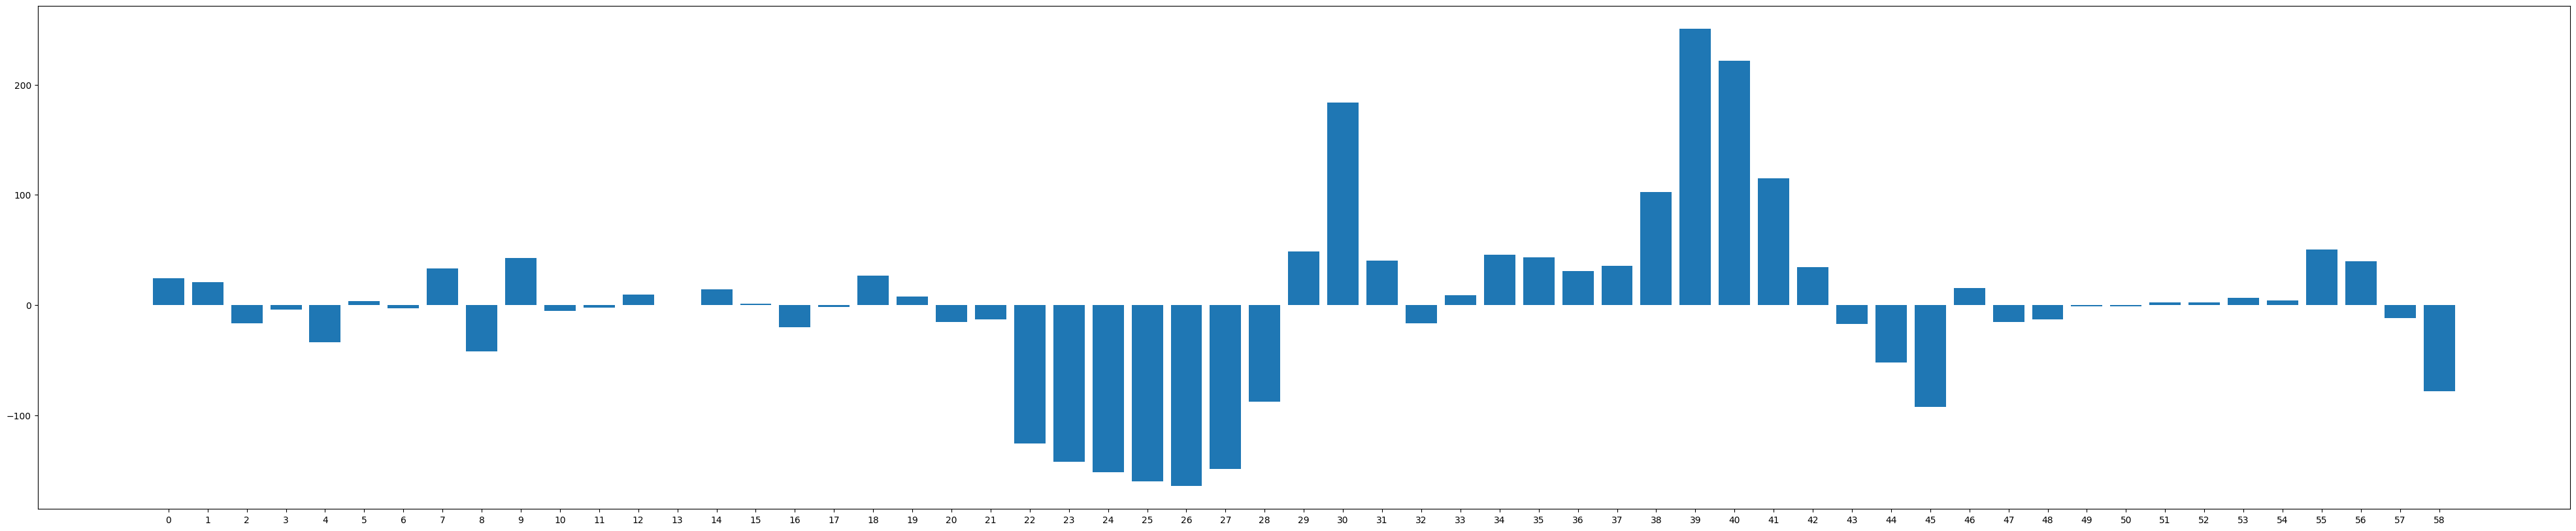

In [159]:
# YOUR CODE HERE
plt.figure(figsize=(50,10))
importance_casual = model.coef_
plt.bar([x for x in range(len(model.coef_))], importance_casual)
plt.xticks(range(59))
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [160]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [229]:
# YOUR CODE HERE
for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(x_train, y_train)
    mse_lasso_sk = mean_squared_error(y_test, regr_lasso.predict(x_test), multioutput = 'uniform_average')
    print(a, "=====",mse_lasso_sk)
    print("score is ",regr_lasso.score(x_test, y_test))

AttributeError: 'LinearRegression' object has no attribute 'Lasso'

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [162]:
# YOUR CODE HERE
for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(x_train, y_train)
    mse_ridge_sk = mean_squared_error(y_test, regr_ridge.predict(x_test), multioutput = 'uniform_average')
    print(a, "=====",mse_ridge_sk)
    print("score is ",regr_ridge.score(x_test, y_test))

0.0001 ===== 10554.058119863017
score is  0.6829723234414504
0.001 ===== 10554.05483009999
score is  0.682972422260873
0.01 ===== 10554.022097839801
score is  0.6829734054876354
0.1 ===== 10553.710618916226
score is  0.6829827618355271
1 ===== 10551.700213472166
score is  0.6830431513235924
10 ===== 10555.404338475557
score is  0.6829318851044595
100 ===== 10968.75029086355
score is  0.6705156083119503


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [163]:
# YOUR CODE HERE
for a in alpha:
    regr_elastic = linear_model.ElasticNet(alpha = a)
    regr_elastic.fit(x_train, y_train)
    mse_elastic_sk = mean_squared_error(y_test, regr_elastic.predict(x_test), multioutput = 'uniform_average')
    print(a, "=====",mse_elastic_sk)
    print("score is ",regr_elastic.score(x_test, y_test))

    print("--------------------------------------------------------------------------------------------------")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.455e+07, tolerance: 4.271e+04
  model = cd_fast.enet_coordinate_descent(


0.0001 ===== 10552.090705534223
score is  0.6830314215425222
--------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.306e+05, tolerance: 4.271e+04
  model = cd_fast.enet_coordinate_descent(


0.001 ===== 10551.7903034947
score is  0.6830404451578502
--------------------------------------------------------------------------------------------------
0.01 ===== 10760.51731165864
score is  0.676770606799779
--------------------------------------------------------------------------------------------------
0.1 ===== 14709.579084502571
score is  0.5581468637606277
--------------------------------------------------------------------------------------------------
1 ===== 22397.065154048618
score is  0.32722660356065525
--------------------------------------------------------------------------------------------------
10 ===== 29494.56250685289
score is  0.11402869716432407
--------------------------------------------------------------------------------------------------
100 ===== 33141.91957900339
score is  0.004467699391623281
--------------------------------------------------------------------------------------------------


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?


In [120]:
target2 = hour_new[["casual","registered"]]

In [164]:
xtrain, xtest, ytrain, ytest = train_test_split(features_1, target2)
xtrain.shape, ytrain.shape

((13034, 59), (13034, 2))

In [165]:
# YOUR CODE HERE
for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(x_train, y_train)
    mse_lasso_sk = mean_squared_error(y_test, regr_lasso.predict(x_test), multioutput = 'uniform_average')
    print(a, "=====",mse_lasso_sk)
    print("score is ",regr_lasso.score(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.452e+06, tolerance: 4.271e+04
  model = cd_fast.enet_coordinate_descent(


0.0001 ===== 10553.99303113535
score is  0.6829742786067402


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.276e+05, tolerance: 4.271e+04
  model = cd_fast.enet_coordinate_descent(


0.001 ===== 10553.397976232902
score is  0.682992153140972
0.01 ===== 10548.032194349911
score is  0.6831533329775775
0.1 ===== 10548.43602401689
score is  0.6831412025553651
1 ===== 11294.238971864168
score is  0.6607384288505707
10 ===== 24218.596178304473
score is  0.2725106126270518
100 ===== 33290.82360647459
score is  -5.148618428929552e-06


In [166]:
for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(xtrain, ytrain)
    mse_ridge_sk = mean_squared_error(ytest, regr_ridge.predict(xtest), multioutput = 'uniform_average')
    print(a, "=====",mse_ridge_sk)
    print("score is ",regr_ridge.score(xtest, ytest))

0.0001 ===== 4106.381685153457
score is  0.6380467458798298
0.001 ===== 4106.381530524004
score is  0.6380467413968569
0.01 ===== 4106.379993447105
score is  0.6380466960934394
0.1 ===== 4106.365517690432
score is  0.6380461969742626
1 ===== 4106.2910387692
score is  0.6380375183845309
10 ===== 4108.590898273626
score is  0.6377730835372651
100 ===== 4263.460045312194
score is  0.6270138392147483


In [167]:
for a in alpha:
    elasticnet_regr = linear_model.ElasticNet(alpha=a)
    elasticnet_regr.fit(xtrain, ytrain)
    mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest), multioutput = 'uniform_average')
    print(a,"====",mse_elatic_sk)
    print("score is ",elasticnet_regr.score(xtest, ytest))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.689e+06, tolerance: 3.123e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.584e+07, tolerance: 3.008e+04
  model = cd_fast.enet_coordinate_descent(


0.0001 ==== 4106.280673812736
score is  0.6380425043993372


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+05, tolerance: 3.008e+04
  model = cd_fast.enet_coordinate_descent(


0.001 ==== 4107.221719597293
score is  0.6378979470017512
0.01 ==== 4185.31713506574
score is  0.632108649791616
0.1 ==== 5780.137701672614
score is  0.5296454738216538
1 ==== 9007.28172092797
score is  0.3054338452568763
10 ==== 11430.941443423488
score is  0.09270281264139912
100 ==== 12466.713606675854
score is  -0.00014550642029453886


In [170]:
elasticnet_regr = linear_model.ElasticNet(alpha=0.0001)
elasticnet_regr.fit(xtrain, ytrain)
mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest), multioutput = 'uniform_average')
print(a,"====",mse_elatic_sk)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.689e+06, tolerance: 3.123e+03
  model = cd_fast.enet_coordinate_descent(


100 ==== 4106.280673812736


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.584e+07, tolerance: 3.008e+04
  model = cd_fast.enet_coordinate_descent(


In [171]:
r2_score(ytrain, elasticnet_regr.predict(xtrain)), r2_score(ytest, elasticnet_regr.predict(xtest))

(0.6346250754763336, 0.6380425043993372)